In this notebook i used Exploratory analysis, feature engineering, data cleaning and machine learning model parameter tuning in order to predict Titanic's survivours using a given dataset.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/train.csv


#  Routine imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
from scipy.stats import norm
import seaborn as sns
sns.set(context = 'paper', palette = 'winter_r', style = 'darkgrid', rc= {'figure.facecolor': 'gray',}, font_scale=1.5)

In [3]:
def Readcsv(data):
    return (pd.read_csv(data,index_col = 'PassengerId'))

traindf = Readcsv('/kaggle/input/titanic/train.csv')
testdf  = Readcsv('/kaggle/input/titanic/test.csv')   

# First look at the data

In [4]:
traindf.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
traindf.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Looking for null values

In [6]:
#check for null
traindf.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

There are many columns(features) in this dataset let us break them down.

Survived: Wheather the person Survived or not.

Pclass: Passanger class indicates the class of that person aboard the ship.

SibSp: Shows the number of Sibling/Spouces they had.

Parch: Parch indicates Parents with children

TIcket: Ticket name/Number.

Fare: How much the Passenger paid.

Cabin: Cabin name of that Passenger.

Embarked: Point of Embarkation where C means Cherbourg, Q means Queenstown, S means Southampton.

<h1><center>Exploratory Analysis</center></h1>

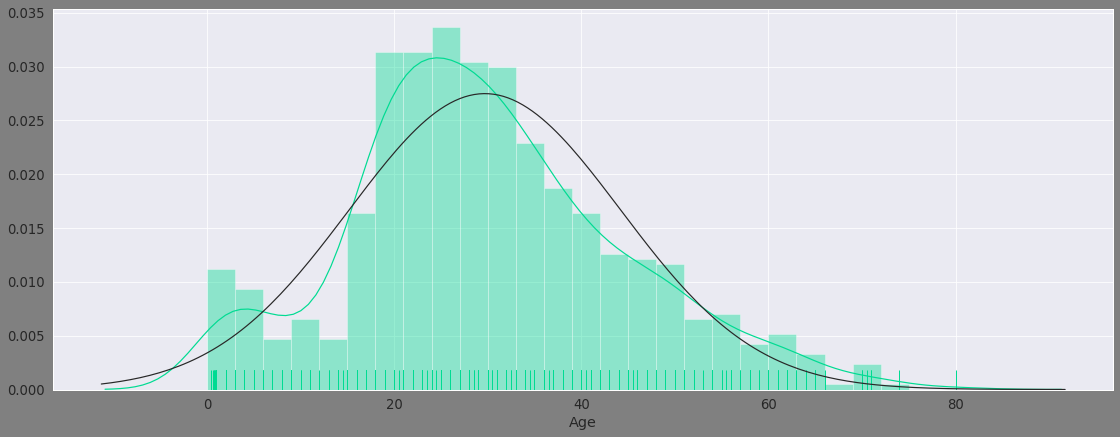

In [7]:
plt.figure(figsize = [19,7])
a = sns.distplot(traindf['Age'].dropna(),bins = range(0,81,3), rug = True, fit = norm)

Age distribution shows a bimodal curve

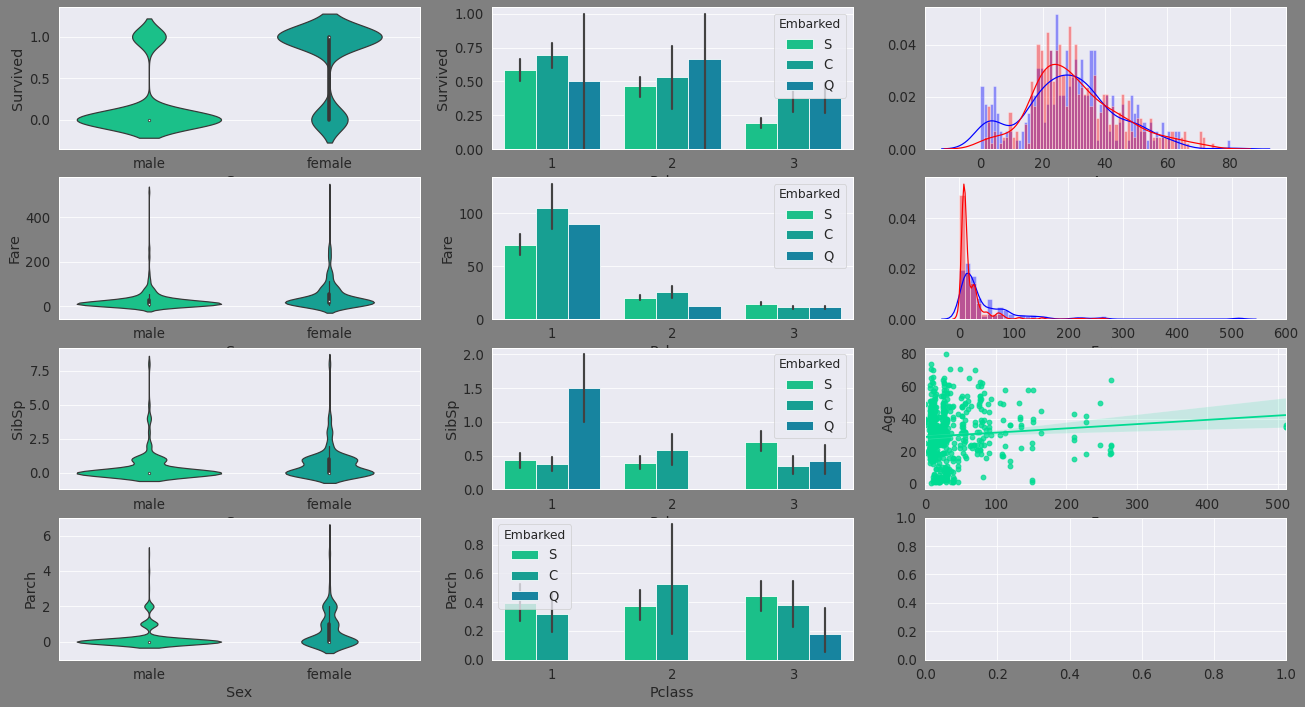

In [8]:
f, ax = plt.subplots(4, 3,figsize=[22,12])
sns.violinplot(x = 'Sex', y = 'Survived', data = traindf,ax = ax[0,0])
sns.barplot(x = 'Pclass',y ='Survived',data = traindf,hue = 'Embarked',ax = ax[0,1])
sns.distplot(traindf[traindf['Survived']==1]['Age'].dropna(),norm_hist = True,bins = np.arange(0,81,1),color = 'blue',
            ax = ax[0,2])
sns.distplot(traindf[traindf['Survived']==0]['Age'].dropna(),norm_hist = True,bins = np.arange(0,81,1), color = 'red',
            ax = ax[0,2])
sns.violinplot(x = 'Sex', y = 'Fare', data = traindf,ax = ax[1,0])
sns.barplot(x ='Pclass', y = 'Fare',data = traindf , hue = 'Embarked', ax = ax[1,1])
sns.distplot(traindf[traindf['Survived']==1]['Fare'].dropna(),bins = np.arange(0,580,10),color = 'blue',
            ax = ax[1,2])
sns.distplot(traindf[traindf['Survived']==0]['Fare'].dropna(),bins = np.arange(0,580,10),color = 'red',
            ax = ax[1,2])
sns.violinplot(x = 'Sex', y ='SibSp',data = traindf,ax = ax[2,0])
sns.barplot(x= 'Pclass', y = 'SibSp', data = traindf, hue = 'Embarked', ax = ax[2,1])
sns.regplot(x = 'Fare', y = 'Age', data = traindf, ax = ax[2,2])
sns.violinplot(x = 'Sex', y = 'Parch', data = traindf, ax = ax[3,0])
sns.barplot(x = 'Pclass', y = 'Parch', data = traindf, hue = 'Embarked', ax = ax[3,1])
plt.close(12)
plt.close(13)
plt.close(14)



Relationship between features

In [9]:
def get_isnull(train,test):
    return(train.isnull().sum(), test.isnull().sum()) 
get_isnull(traindf,testdf)

(Survived      0
 Pclass        0
 Name          0
 Sex           0
 Age         177
 SibSp         0
 Parch         0
 Ticket        0
 Fare          0
 Cabin       687
 Embarked      2
 dtype: int64,
 Pclass        0
 Name          0
 Sex           0
 Age          86
 SibSp         0
 Parch         0
 Ticket        0
 Fare          1
 Cabin       327
 Embarked      0
 dtype: int64)

Missing values en trainin and test set

In [10]:
def combine(data1,data2):
    fulldf = pd.concat([data1,data2])
    return fulldf
def separate(data):
    data1 = data.iloc[:len(traindf)]
    data2 = data.iloc[len(traindf):]
    return data1, data2

In [11]:
testdf[testdf['Fare'].isnull()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [12]:
def filling(data1,data2):
    data = combine(data1,data2)
    data['Embarked'] = data['Embarked'].fillna('C')
    data['Age']      = data['Age'].fillna(data['Age'].median())
    data['Fare']     = data['Fare'].fillna(data['Fare'].median())
    data['Cabin']    = data['Cabin'].fillna('Z')
    data['Cabin']    = data['Cabin'].apply(lambda x: str(x)[0])
    traindf, testdf    = separate(data)
    return traindf, testdf
traindf, testdf = filling(traindf, testdf)

Imputing missing values

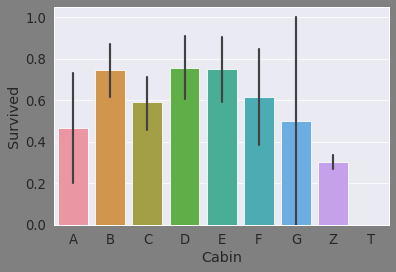

In [13]:
sns.barplot(x= 'Cabin', y = 'Survived', data = traindf ,order = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'Z', 'T'])

In [14]:
def classif(data1, data2):
    data = combine(data1,data2)
    data['Cabin'] = data['Cabin'].replace(['B', 'D', 'E'], 'H')   
    data['Cabin'] = data['Cabin'].replace(['F', 'C'], 'M')        
    data['Cabin'] = data['Cabin'].replace(['T', 'G', 'A',], 'L')  
    data['Cabin'] = data['Cabin'].replace(['Z'],'X')              
    traindf, testdf    = separate(data)
    return traindf, testdf
traindf, testdf = classif(traindf,testdf)

In [15]:
def family(data1, data2):
    data = combine(data1,data2)
    data['Family'] = data['SibSp'] + data['Parch'] + 1
    data['Alone']  = data['Family'].apply(lambda x: 1 if x == 1 else 0)
    data.drop(['SibSp','Parch'],axis = 1, inplace = True)
    traindf, testdf    = separate(data)
    return traindf, testdf
traindf, testdf = family(traindf, testdf)

group by family size

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3720: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try countplot
  warnings.warn(msg, UserWarning)


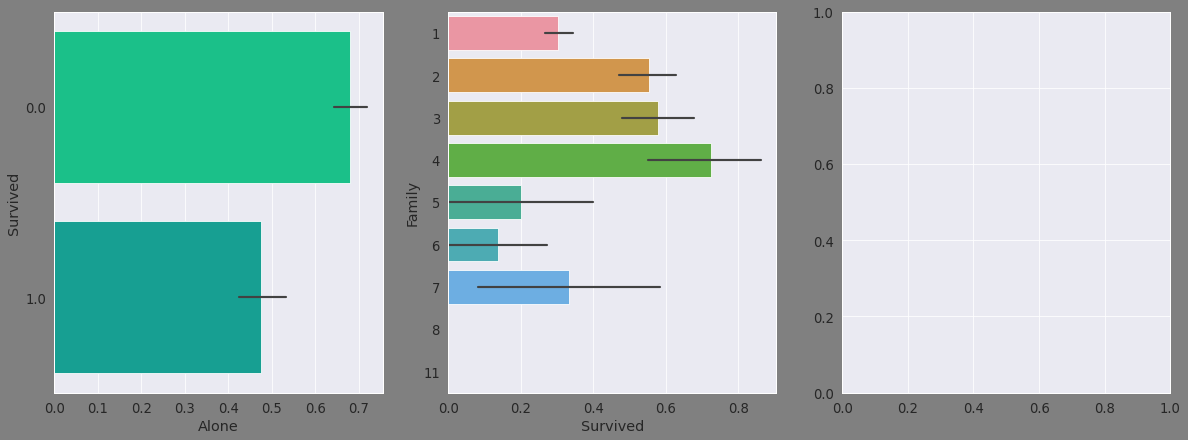

In [16]:
f,ax = plt.subplots(1,3,figsize=[20,7])
sns.barplot(x = 'Alone', y = 'Survived', data = traindf,orient = 'h', ax = ax[0])
sns.barplot(x = 'Survived', y = 'Family', data = traindf,orient = 'h', ax = ax[1])
sns.factorplot(y = 'Family',data = traindf, kind = 'count', orient = 'h', ax = ax[2])
plt.close(2)
plt.close(3)

In [17]:
traindf.head()

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Family,Alone
PassengerId,,,,,,,,,,,
1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,X,S,2,0
2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,M,C,2,0
3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,X,S,1,1
4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,M,S,2,0
5,0.0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,X,S,1,1


In [18]:
def FamilyGroup(data1, data2):
    data = combine(data1,data2)
    data.loc[data['Family'] > 2, 'FamilyGroup'] = 3
    data.loc[data['Family'] == 1, 'FamilyGroup'] = 1
    data.loc[data['Family'] == 2, 'FamilyGroup'] = 2
    traindf, testdf    = separate(data)
    return traindf, testdf
traindf, testdf = FamilyGroup(traindf, testdf)
#testdf  = FamilyGroup(testdf) 

group by Family group size

In [19]:
def mapping(data1, data2):
    data = combine(data1,data2)
    data['Embarked'] = data['Embarked'].map({'C':1, 'S':2, 'Q':3})
    data['Sex']      = data['Sex'].map({'male': 1,'female':0})
    data['CabinGroup'] = data['Cabin'].map({'H': 0, 'M': 1, 'L': 2, 'X':3})
    traindf, testdf    = separate(data)
    return traindf, testdf
traindf, testdf = mapping(traindf, testdf)
#testdf  = mapping(testdf)

Encode categorical labels to be able to train the model on this features

In [20]:
traindf['CabinGroup'].value_counts()

3    687
0    112
1     72
2     20
Name: CabinGroup, dtype: int64

In [21]:
def Titles(data1, data2):
    data = combine(data1,data2)
    data['Title'] = data['Name'].apply(lambda x: str(x).split(',')[1].split('.')[0])
    data['TitleGroup'] = 0
    data['TitleGroup'] = data['Title'].replace(['Mme','Ms','Lady','Sir','Mlle','the Countess',],0,          
                                            regex = True).replace(['Mrs','Miss','Master',],1,               
                                            regex = True).replace(['Dr','Major','Col','Mr'],2,              
                                            regex = True).replace(['Don','Rev','Capt','Jonkheer','Dona'],4, 
                                            regex = True)
    traindf, testdf    = separate(data)
    return traindf, testdf
traindf, testdf = Titles(traindf, testdf)


group by name tittle

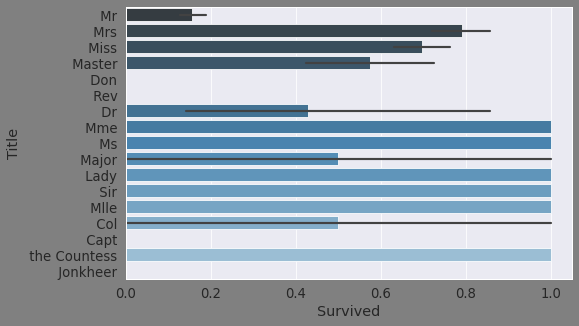

In [22]:
plt.figure(figsize = [8,5])
sns.barplot(x = 'Survived', y = 'Title', data = traindf, palette = 'Blues_d',)

In [23]:
def age_distribution(data1, data2):
    data = combine(data1,data2)
    #data.loc[data['Age']].round()
    data.loc[data['Age'] <= 16, 'AgeGroup'] = 1
    data.loc[(data['Age'] > 16) & (data['Age'] <= 40), 'AgeGroup'] = 2
    data.loc[(data['Age'] > 40) & (data['Age'] < 60), 'AgeGroup'] = 3
    data.loc[(data['Age'] >= 60), 'AgeGroup'] = 4
    #data['AgeGroup'].astype(int)
    traindf, testdf    = separate(data)
    return traindf, testdf
traindf, testdf = age_distribution(traindf, testdf)

group by age group

In [24]:
traindf.head()

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Family,Alone,FamilyGroup,CabinGroup,Title,TitleGroup,AgeGroup
PassengerId,,,,,,,,,,,,,,,,
1,0.0,3,"Braund, Mr. Owen Harris",1,22.0,A/5 21171,7.2500,X,2,2,0,2.0,3,Mr,2,2.0
2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,PC 17599,71.2833,M,1,2,0,2.0,1,Mrs,1,2.0
3,1.0,3,"Heikkinen, Miss. Laina",0,26.0,STON/O2. 3101282,7.9250,X,2,1,1,1.0,3,Miss,1,2.0
4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,113803,53.1000,M,2,2,0,2.0,1,Mrs,1,2.0
5,0.0,3,"Allen, Mr. William Henry",1,35.0,373450,8.0500,X,2,1,1,1.0,3,Mr,2,2.0


/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


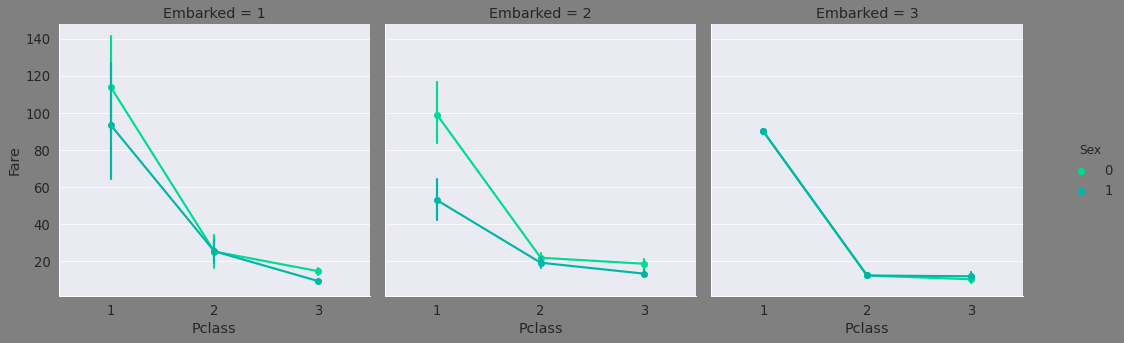

In [25]:
sns.factorplot(x = 'Pclass', y = 'Fare', col = 'Embarked', hue = 'Sex', data = traindf, margin_titles = True)

In [26]:
def fare_distribution(data1, data2):
    data = combine(data1,data2)
    payment = data.groupby('Pclass')['Fare'].mean()
    data.loc[(data['Fare'] < payment[3]),'FareGroup'] = 1
    data.loc[(data['Fare'] > payment[3]) & (data['Fare'] <  payment[2]),'FareGroup'] = 2
    data.loc[(data['Fare'] > payment[2]) & (data['Fare'] <  payment[1]), 'FareGroup'] = 3
    data.loc[(data['Fare'] > payment[1]),'FareGroup'] = 4
    data['FareGroup'] = data['FareGroup'].astype(int)
    traindf, testdf    = separate(data)
    return traindf, testdf
traindf, testdf = fare_distribution(traindf, testdf)


In [27]:
def Tickets(data1, data2):
    data = combine(data1,data2)
    data['Ticket'] = data['Ticket'].str.replace('.','').str.replace('/','').str.replace(' ','')
    data['TicketLength'] = data['Ticket'].apply(lambda x: len(str(x)))
    traindf, testdf    = separate(data)
    return traindf, testdf
traindf, testdf = Tickets(traindf, testdf)


Group by ticket length

In [28]:
def surname(data1, data2):
    data = combine(data1,data2)
    data['Surname'] = data['Name'].apply(lambda x: str(x).split(' ')[0].split(',')[0])
    Shares = 0
    Shares = data.groupby('Surname').apply(lambda x: x.shape[0])
    data['SharedSurname'] = data['Surname'].map(Shares)
    traindf, testdf    = separate(data)
    return traindf, testdf

traindf, testdf = surname(traindf, testdf)

groupby surename

In [29]:
def SharedSurname(data1, data2):
    data = combine(data1,data2)
    Shares = 0
    Shares = data.groupby('Surname').apply(lambda x: x.shape[0])
    data['SharedSurname'] = data['Surname'].map(Shares)
    traindf, testdf    = separate(data)
    return traindf, testdf
traindf, testdf = SharedSurname(traindf, testdf)
#testdf  = SharedSurname(testdf)

In [30]:
def fare_distribution(data1, data2):
    data = combine(data1,data2)
    payment = data.groupby('Pclass')['Fare'].mean()
    data.loc[(data['Fare'] < payment[3]),'FareGroup'] = 1
    data.loc[(data['Fare'] > payment[3]) & (data['Fare'] <  payment[2]),'FareGroup'] = 2
    data.loc[(data['Fare'] > payment[2]) & (data['Fare'] <  payment[1]), 'FareGroup'] = 3
    data.loc[(data['Fare'] > payment[1]),'FareGroup'] = 4
    #data['Fare'] = data['Fare'].map({'Very Low': 0, 'Low': 1, 'Medium':2, 'High':3})
    data['FareGroup'] = data['FareGroup'].astype(int)
    traindf, testdf    = separate(data)
    return traindf, testdf
#payment = fulldf.groupby('Pclass')['Fare'].mean()
traindf, testdf = fare_distribution(traindf, testdf)
#testdf = fare_distribution(testdf)

# Models

In [31]:
X = traindf.drop(['Name','Title','Surname','Survived','Cabin','Ticket',
                  'Age','Fare','Family','Alone'],axis = 1)
y = traindf['Survived']
X.shape , y.shape

((891, 10), (891,))

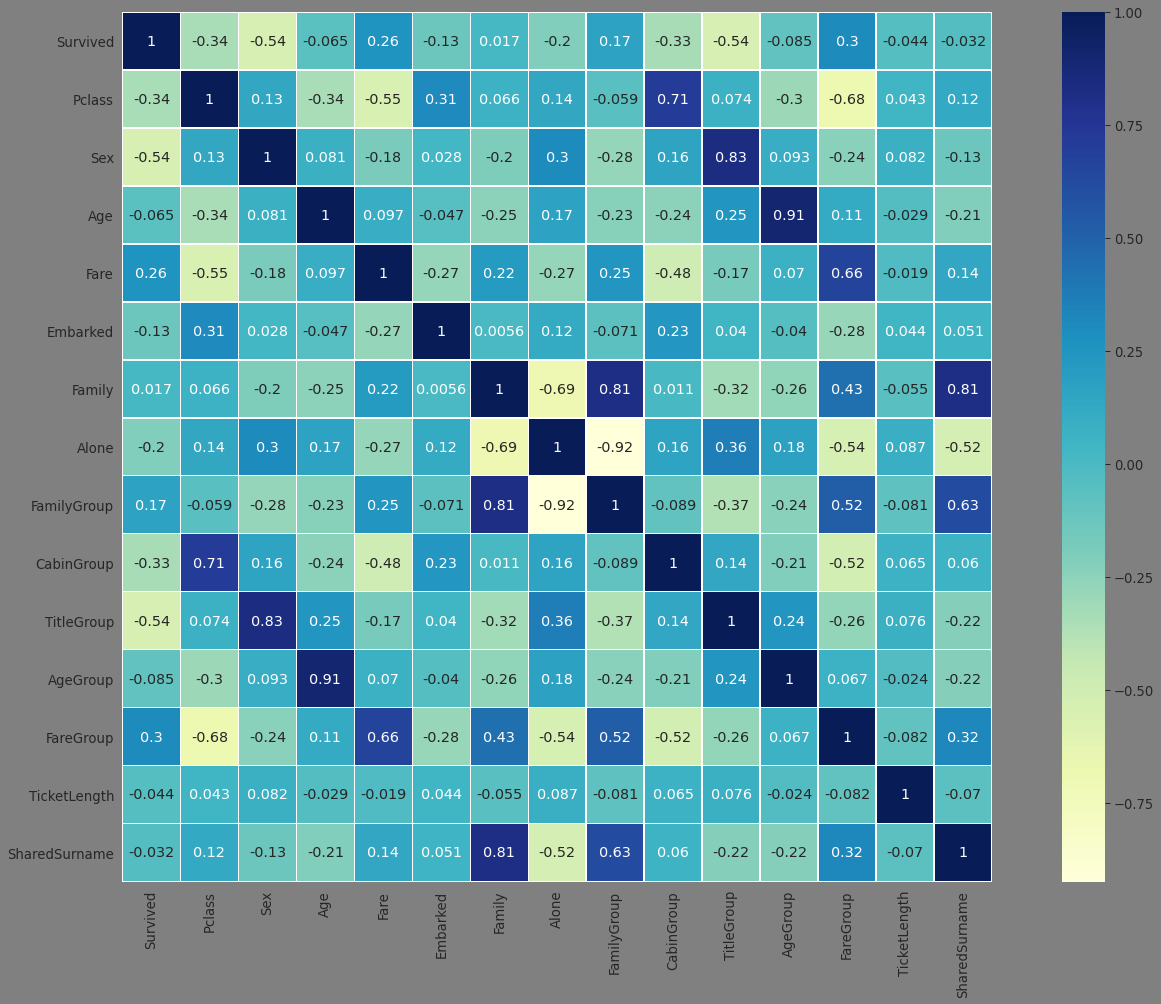

In [32]:
f, ax = plt.subplots(figsize = [25,16])
sns.heatmap(traindf.corr(),linewidths = .5, annot = True, cmap = 'YlGnBu', square = True)

Checking for variable correlation

In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier, plot_importance 

In [34]:

npX = np.array(X).copy()
npy = np.array(y).copy()

In [35]:
clf_rf = RandomForestClassifier()
clf_et = ExtraTreesClassifier()
clf_bc = BaggingClassifier()
clf_ada = AdaBoostClassifier()
clf_dt = DecisionTreeClassifier()
clf_xg = XGBClassifier()
clf_lr = LogisticRegression()
clf_svm = SVC()

Base algorithms to use

In [36]:
Classifiers = ['RandomForest','ExtraTrees','Bagging','AdaBoost','DecisionTree','XGBoost','LogisticRegression','SVM']
scores = []
models = [clf_rf, clf_et, clf_bc, clf_ada, clf_dt, clf_xg, clf_lr, clf_svm]
for model in models:
    score = cross_val_score(model, npX, npy, scoring = 'accuracy', cv = 10, n_jobs = -1).mean()
    scores.append(score)

In [37]:
mode = pd.DataFrame(scores, index = Classifiers, columns = ['score']).sort_values(by = 'score',
             ascending = False)

In [38]:
mode

,score
SVM,0.826055
AdaBoost,0.823808
XGBoost,0.822684
LogisticRegression,0.818152
Bagging,0.815980
RandomForest,0.814844
ExtraTrees,0.811511
DecisionTree,0.791273


In [39]:
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier


# Create Base Learners
base_learners = [
                 ('rf_1', SVC()),
                 ('rf_2', KNeighborsClassifier(n_neighbors=5)),
                 ('rf_3',XGBClassifier()),
                 ('rf_4',AdaBoostClassifier()),
                 ('rf_5',BaggingClassifier())          
                ]

# Initialize Stacking Classifier with the Meta Learner
clf = StackingClassifier(estimators=base_learners, final_estimator=LogisticRegression())
clf
print(cross_val_score(clf, npX, npy, scoring = 'accuracy', cv = 10, n_jobs = -1).mean())


0.8361298377028714


Precisition of stacking algorithms with cv score 

# Parameter tuning

In [40]:
parameters_xg = {'max_depth':[3,6,7], 'learning_rate': [0.1,0.2], 'n_estimators': [300,200], 
                 'min_child_weight': [4], 'reg_alpha': [6,0], 'reg_lambda': [1,8],'max_delta_step':[2],
                 'gamma':[0],'seed':[1]}

parameters_svm = {'C':[0.9,0.01],'kernel':['rbf','linear'], 'gamma':[0,0.1,'auto'], 'probability':[True,False],
                  'random_state':[0,7,16],'decision_function_shape':['ovo','ovr'],'degree':[3,4,10]}

parameters_rf = {'n_estimators': [100,50], 'max_features': [7,'auto',None],
                 'n_jobs': [-1], 'min_samples_leaf': [2,4,], 'random_state':[1,7,], 
                 'min_samples_split':[2,6,], 'oob_score': [True,False],
                 'criterion': ['gini'], 'warm_start': [True,False]}



In [41]:
def grid(model,parameters):
    grid = GridSearchCV(estimator = model, param_grid = parameters, cv = 10, 
                        scoring = 'accuracy')
    grid.fit(npX,npy)
    return grid.best_score_, grid.best_estimator_.get_params()

In [42]:
def imp_features(model, model_name, params):
    Model = model(**params)
    Model.fit(npX,npy)
    names = X.columns
    feature = Model.feature_importances_
    important_features = pd.Series(data = feature, index = names,)
    important_features = important_features.sort_values(ascending = True)
    return important_features.plot(kind = 'barh', grid = False,title = model_name)

0.8439950062421973


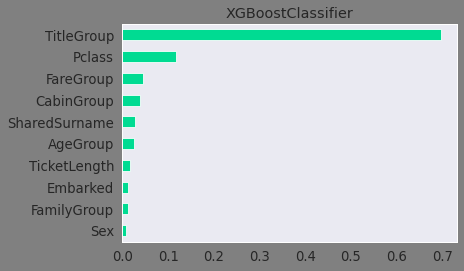

In [43]:
best_score_xg, best_params_xg = grid(clf_xg,parameters_xg)
print(best_score_xg)
imp_features(XGBClassifier, 'XGBoostClassifier', best_params_xg)

0.8361298377028714


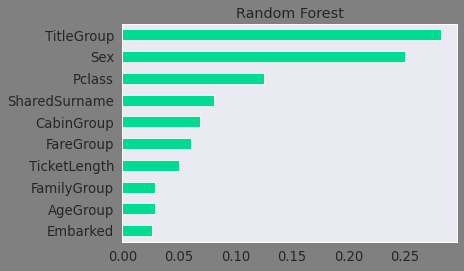

In [44]:
best_score_rf, best_params_rf = grid(clf_rf, parameters_rf)
print(best_score_rf)
imp_features(RandomForestClassifier,'Random Forest', best_params_rf)

In [45]:
best_score_svm, best_params_svm = grid(clf_svm, parameters_svm)
print(best_score_svm)

0.8226716604244693


In [46]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap
x = StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = .2)
X_train_reduced = PCA(n_components = 2).fit_transform(X_train)
X_test_reduced  = PCA(n_components=  2).fit_transform(X_test)

In [47]:
def boundaries(model, heading, best_params):
    Model = model(**best_params)
    Model.fit(X_train_reduced, y_train)

    X_set, y_set = np.concatenate([X_train_reduced, X_test_reduced], axis = 0), np.concatenate([y_train, y_test], axis = 0)
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                             np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

    #plt.figure(figsize = [15,16])
    plt.contourf(X1, X2, Model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                     alpha = 0.5, cmap = ListedColormap(('k', 'blue')))
    
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())

    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
    plt.xticks(fontsize = 3)
    plt.yticks(fontsize = 3)

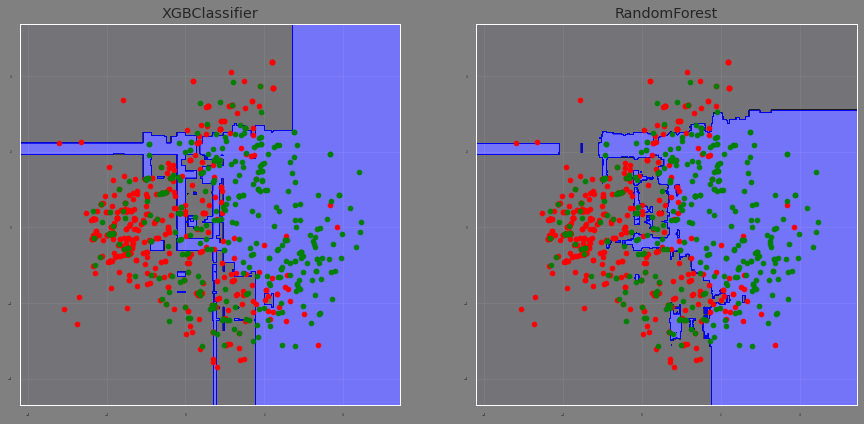

In [48]:
fig = plt.figure(figsize=[15,7])

ax = plt.subplot(1,2,1)
plt.title('XGBClassifier')
boundaries(XGBClassifier,'eXtreme Boosting Classifier', best_params_xg)


ax = plt.subplot(1,2,2)
plt.title('RandomForest')
boundaries(RandomForestClassifier, 'Random Forest', best_params_rf)

Text(0.5, 1.0, 'Support Vector Machines')

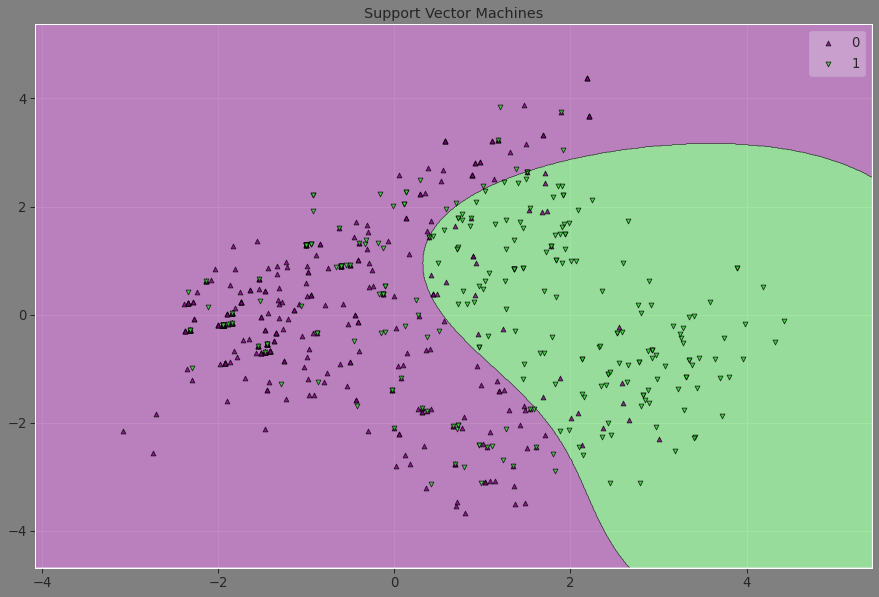

In [49]:
from mlxtend.plotting import plot_decision_regions
t = np.array(y_train)
t = t.astype(np.integer)
clf_svm = SVC(**best_params_svm)
clf_svm.fit(X_train_reduced,t)
plt.figure(figsize = [15,10])
plot_decision_regions(X_train_reduced, t, clf = clf_svm, hide_spines = False, colors = 'purple,limegreen',
                      markers = ['^','v'])
plt.title('Support Vector Machines')

In [50]:
testdf.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'Ticket', 'Fare', 'Cabin',
       'Embarked', 'Family', 'Alone', 'FamilyGroup', 'CabinGroup', 'Title',
       'TitleGroup', 'AgeGroup', 'FareGroup', 'TicketLength', 'Surname',
       'SharedSurname'],
      dtype='object')

In [51]:
clf_svm = SVC(**best_params_svm)
clf_svm.fit(npX,npy)
testdf = testdf.drop(['Name','Title','Survived','Cabin','Ticket',
                  'Age','Fare','Family','Alone','Surname'],axis = 1)
nptest = np.array(testdf)
pred = clf_svm.predict(nptest)
predictions = pd.DataFrame(pred, index = testdf.index, columns = ['Survived'])
predictions.to_csv('predictions_svm_with_groups.csv')